### James Cooper | CSC 529 | Assignment 2

### Problem 2

In [1]:
cd "C:/Users/James Cooper/Desktop/DePaul/Advanced Data Mining/Homework2"

C:\Users\James Cooper\Desktop\DePaul\Advanced Data Mining\Homework2


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import naive_bayes
bclassifier = naive_bayes.GaussianNB()
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [42]:
dat = pd.read_csv("Wine_data.csv", sep=',')

In [8]:
data_2 = dat.drop('Classes', 1).values
classes_2 = dat['Classes'].astype('int').values

In [96]:
holdout_ratios = [.75, .65, .55, .45, .35, .25, .15]

In [105]:
from sklearn.metrics import zero_one_loss

dt_score_list = []

print 'Decision Tree Training Scores'         

for i in holdout_ratios:
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data_2, classes_2, test_size = i, random_state = 123)
    dtree1 = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=5, min_samples_split=4)
    dtree1_fit = dtree1.fit(X_train, y_train)
    y_val_train = y_train
    y_hat_train = dtree.predict(X_train)
    substitution = zero_one_loss(y_val_train, y_hat_train)
    dt_score_list.append(substitution)

    print ("{0:.5f}".format(substitution))


Decision Tree Training Scores
0.00000
0.08065
0.08750
0.13402
0.13913
0.14286
0.17219


In [106]:
dt_test_list = []

for i in holdout_ratios:
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data_2, classes_2, test_size = i, random_state = 123)
    dtree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=5, min_samples_split=4)
    dtree_fit = dtree2.fit(X_train, y_train)
    y_val_test = y_test
    y_hat_test = dtree2.predict(X_test)
    generalization = zero_one_loss(y_val_test, y_hat_test)
    dt_test_list.append(generalization)
    
    print("{0:.5f}".format(generalization))

0.18657
0.20690
0.15306
0.13580
0.11111
0.15556
0.18519


In [110]:
bayes_train_list = []

for i in holdout_ratios:
    from sklearn.cross_validation import train_test_split
    X_trainb, X_testb, y_trainb, y_testb = train_test_split(data_2, classes_2, test_size=i, random_state = 24)
    bclassifier = naive_bayes.GaussianNB()
    bfitted = bclassifier.fit(X_trainb, y_trainb)
    y_valb = y_trainb
    y_predb = bfitted.predict(X_trainb)
    substitution_b = zero_one_loss(y_valb, y_predb)
    bayes_train_list.append(substitution_b)

    print(substitution_b)

0.0
0.0
0.0
0.0
0.00869565217391
0.00751879699248
0.00662251655629


In [108]:
bayes_test_list = []

for i in holdout_ratios:
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data_2, classes_2, test_size = i, random_state = 24)
    bclassifier_test = naive_bayes.GaussianNB()
    bclassifier_test = bclassifier_test.fit(X_train, y_train)
    y_val_testb = y_test
    y_hat_testb = bclassifier_test.predict(X_test)
    generalization_b = zero_one_loss(y_val_testb, y_hat_testb)
    bayes_test_list.append(generalization_b)
    
    print("{0:.5f}".format(generalization_b))

0.02985
0.03448
0.03061
0.04938
0.03175
0.04444
0.07407


In [93]:
print 'D Tree Train'            'D Tree Test'                'Bayes Train'             'Bayes Test'

print (generalization_b)

D Tree TrainD Tree TestBayes TrainBayes Test
0.0740740740741


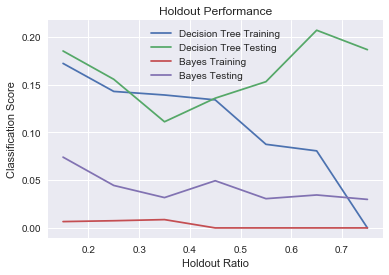

In [117]:
plt.plot(holdout_ratios, dt_score_list, label='Decision Tree Training')
plt.plot(holdout_ratios, dt_test_list, label = 'Decision Tree Testing')
plt.plot(holdout_ratios, bayes_train_list, label='Bayes Training')
plt.plot(holdout_ratios, bayes_test_list, label='Bayes Testing')
plt.legend()

plt.title('Holdout Performance')
plt.xlabel('Holdout Ratio')
plt.ylabel('Classification Score')
